_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

#This line neatly shows all the shapes of the pd's I imported
print (income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape)

print (income.head(),'\n\n', lifespan.head(),'\n\n', population.head(),'\n\n'
        , entities.head(),'\n\n', concepts.head())

(46513, 3) (44370, 3) (59297, 3) (273, 33) (590, 16)
   geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
2  afg  1802                                                603    
3  afg  1803                                                603    
4  afg  1804                                                603     

    geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42 

    geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000 

   country alt_5  ... world_4region        world_6region
0    abkh   NaN  ...        europe  europe_central_asia
1     abw   NaN 

In [35]:
#I need to print the last 2 csv into their own lines to see better
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

In [37]:
#I kept an extra 2 columns than the assignment to work on those
df = income
df = pd.merge(income, lifespan)
df = pd.merge(df, population)
df = pd.merge(df, entities[['country', 'name', 'world_4region', 'world_6region',
                            'landlocked', 'main_religion_2008']],left_on='geo', right_on='country')

print(df.shape)
df.head()

(40437, 11)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region,landlocked,main_religion_2008
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim


In [38]:
#Here I rename the columns to make them more readable and less clunky
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region',
    'main_religion_2008': 'religion'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,landlocked,religion
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim


In [53]:
df.describe(exclude='number')

,geo,country_code,country,4region,6region,landlocked,religion
count,40437,40437,40437,40437,40437,40437,36714
unique,187,187,187,4,6,2,3
top,pak,pak,Slovak Republic,africa,europe_central_asia,coastline,christian
freq,219,219,219,11826,10778,31630,24231


In [63]:
#Here I look at the different religions to see what I will be working with.
#There are only 3 unique
df['religion'].unique()

array(['muslim', 'christian', nan, 'eastern_religions'], dtype=object)

In [68]:
#Here I make the df I will work with. Only keeping the 3 religions.
religion_eastern = df[df.religion == 'eastern_religions']
religion_eastern.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,landlocked,religion
5522,btn,1800,629,28.8,89989,btn,Bhutan,asia,south_asia,landlocked,eastern_religions
5523,btn,1801,629,28.8,89989,btn,Bhutan,asia,south_asia,landlocked,eastern_religions
5524,btn,1802,630,28.8,89989,btn,Bhutan,asia,south_asia,landlocked,eastern_religions
5525,btn,1803,630,28.8,89989,btn,Bhutan,asia,south_asia,landlocked,eastern_religions
5526,btn,1804,630,28.8,89989,btn,Bhutan,asia,south_asia,landlocked,eastern_religions


In [71]:
religion_christian = df[df.religion == 'christian']
religion_christian.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,landlocked,religion
219,ago,1800,618,26.98,1567028,ago,Angola,africa,sub_saharan_africa,coastline,christian
220,ago,1801,620,26.98,1567028,ago,Angola,africa,sub_saharan_africa,coastline,christian
221,ago,1802,623,26.98,1567028,ago,Angola,africa,sub_saharan_africa,coastline,christian
222,ago,1803,626,26.98,1567028,ago,Angola,africa,sub_saharan_africa,coastline,christian
223,ago,1804,628,26.98,1567028,ago,Angola,africa,sub_saharan_africa,coastline,christian


In [73]:
religion_muslim = df[df.religion == 'muslim']
religion_muslim.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,landlocked,religion
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia,landlocked,muslim


In [0]:
#I can make this inside the other function if I wanted to.
def choses_years(df_data, years):
  """This function takes in a data frame and filters by the years you choose."""
  df_data = df_data[df_data.year.isin(years)]
  return df_data


In [0]:
#Here I separate the years I will work with
years = [1818, 1868, 1918, 1968, 2018]


muslim_years = choses_years(religion_muslim, years)
christian_years = choses_years(religion_christian, years)
eastern_years = choses_years(religion_eastern, years)

In [134]:
#I wanted to demonstrate if a string would be called correctly
muslim_years.iloc[1]['religion']

'muslim'

In [0]:
def graph_nations_religion_to_lifespan(df_data, years):
  """Takes in df_data and years to print graphs based on 'income', to 'lifespan' for the mean income
  of each region. Enjoy!"""
  for year in years:
    sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df_data[df_data.year==year])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0, 90))
    income_mean_year = df_data[df_data.year==year].income.mean()
    plt.title(str(df_data.iloc[1]['religion']) +' mean income for ' +
              str(year)+' is '+str(int(income_mean_year)))
    plt.axvline(x=df_data[df_data.year==year].income.mean(), color='grey')

  pass

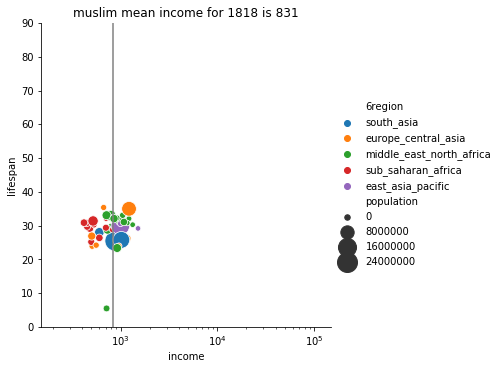

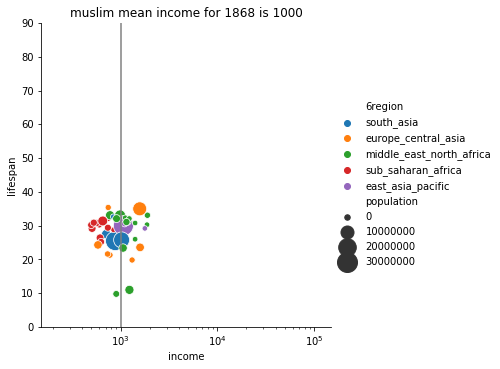

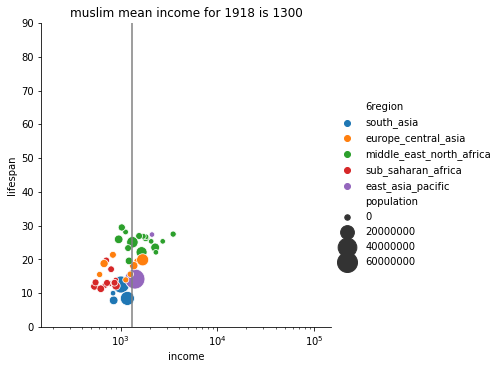

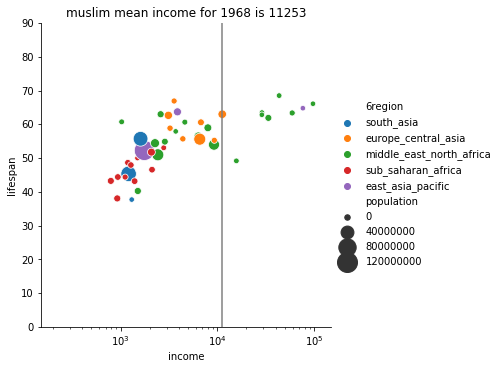

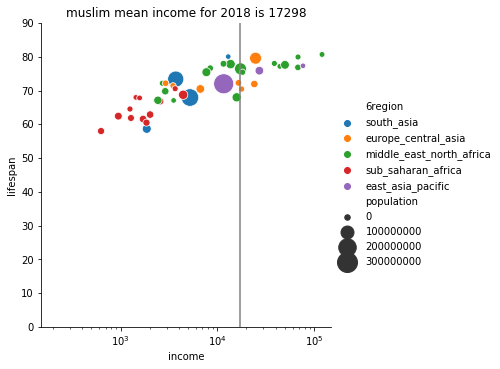

In [205]:
graph_nations_religion_to_lifespan(muslim_years, years)

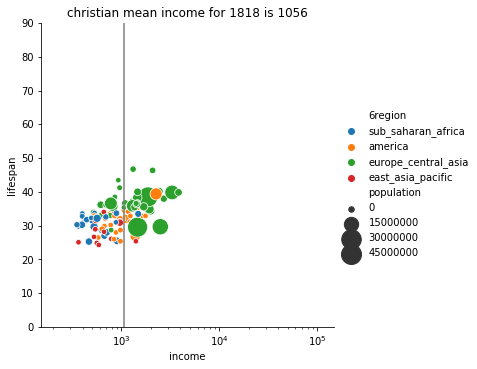

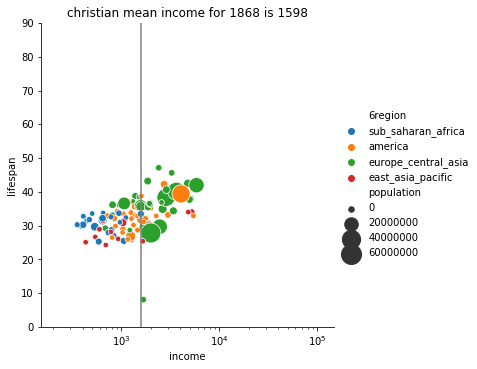

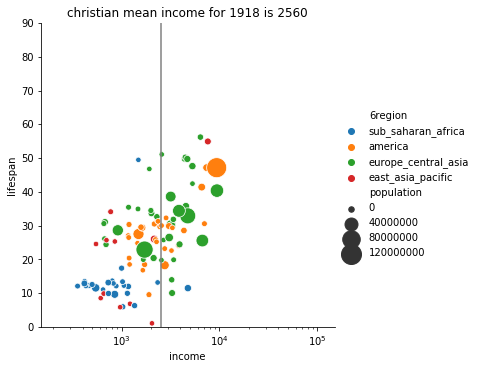

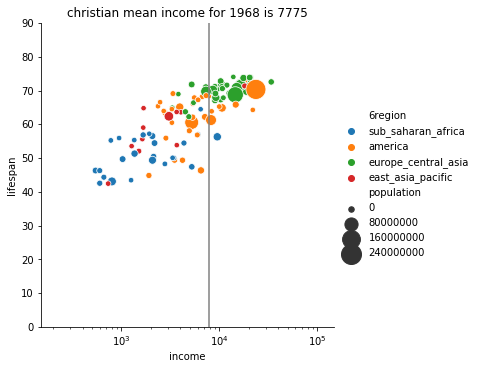

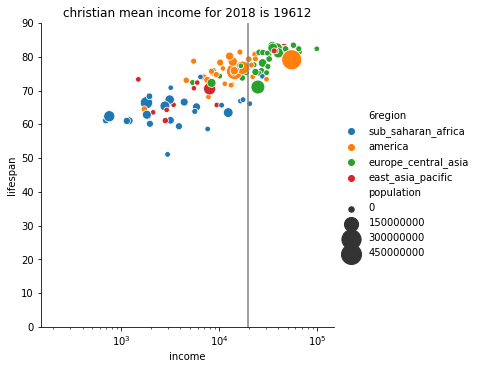

In [207]:
graph_nations_religion_to_lifespan(christian_years, years)

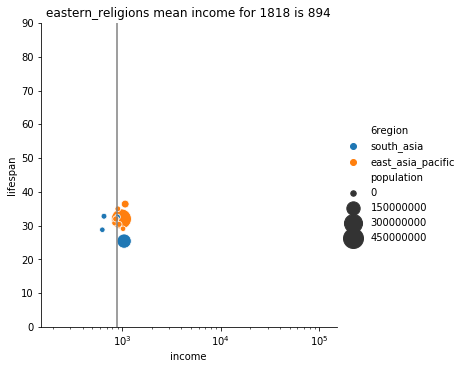

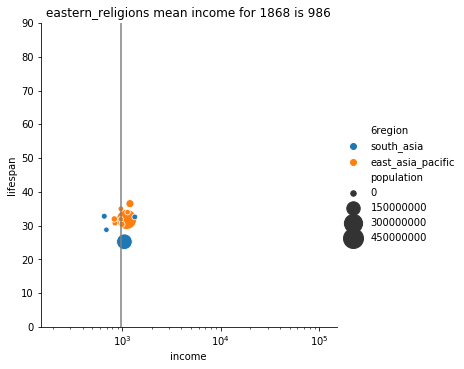

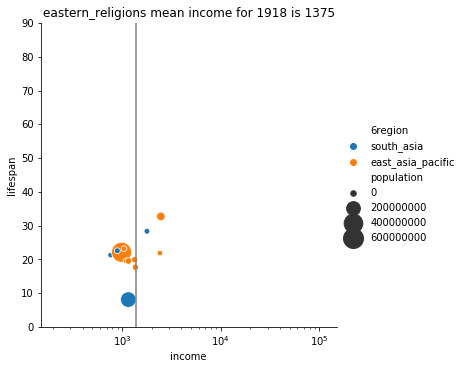

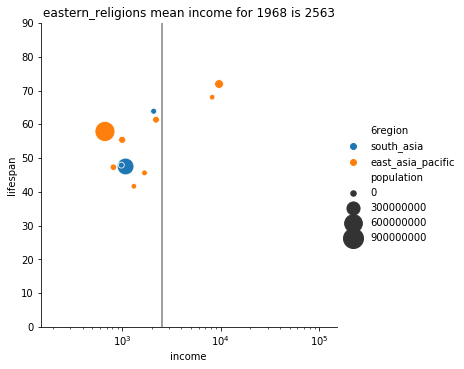

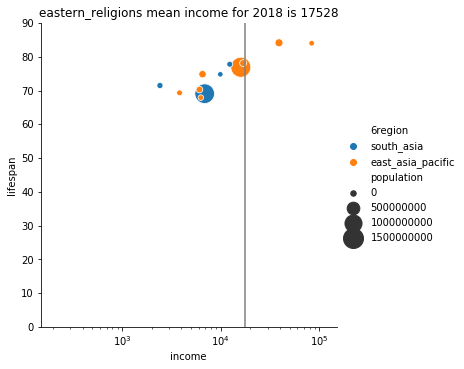

In [206]:
graph_nations_religion_to_lifespan(eastern_years, years)

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO